In [10]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Regresión Lineal

Tratatemos de optimizar la regresión lineal mediante una estandarización de los datos

In [4]:
# Importamos los datos

train = pd.read_csv('../data/processed/train_tratado.csv')

# Definición de variables

In [3]:
# Nombramos a 'X' y a 'y'. Quitamos las variables que no son numéricas

X = train[['Inches', 'Ram', 'Memory', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS']]

y = train['Price_euros']

In [5]:
# Separamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 20)
(183, 20)
(729,)
(183,)


# Estandarización y composición del modelo

In [6]:
# Estandarizamos

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale_fit = std_scale.fit(X_train)

X_train_scale = std_scale_fit.transform(X_train)
X_test_scale = std_scale_fit.transform(X_test)

model_scale = LinearRegression()
model_scale.fit(X_train_scale, y_train)

LinearRegression()

In [7]:
# Vemos el valor atribuido por el modelo a cada coeficiente

intercept_scal = model_scale.intercept_
features_std = pd.DataFrame(model_scale.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
Windows 10,6.892288e+14
Linux,3.884875e+14
No OS,3.884875e+14
Windows 7,3.306889e+14
Chrome OS,2.579634e+14
macOS,1.772070e+14
Mac OS X,1.499746e+14
Windows 10 S,1.499746e+14
Ram,4.246150e+02
Weight,8.955483e+01


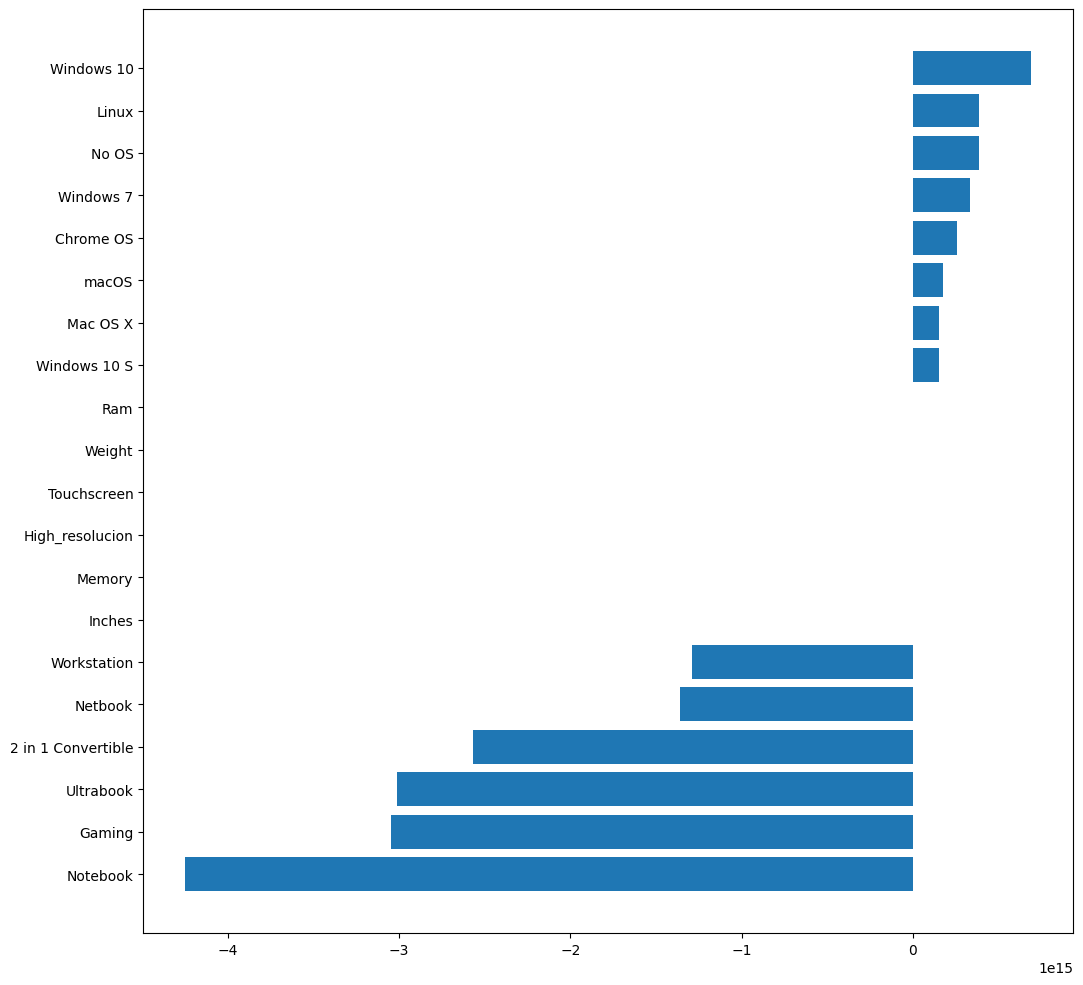

In [8]:
plt.figure(figsize=(12, 12))
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

# Evaluación del modelo

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


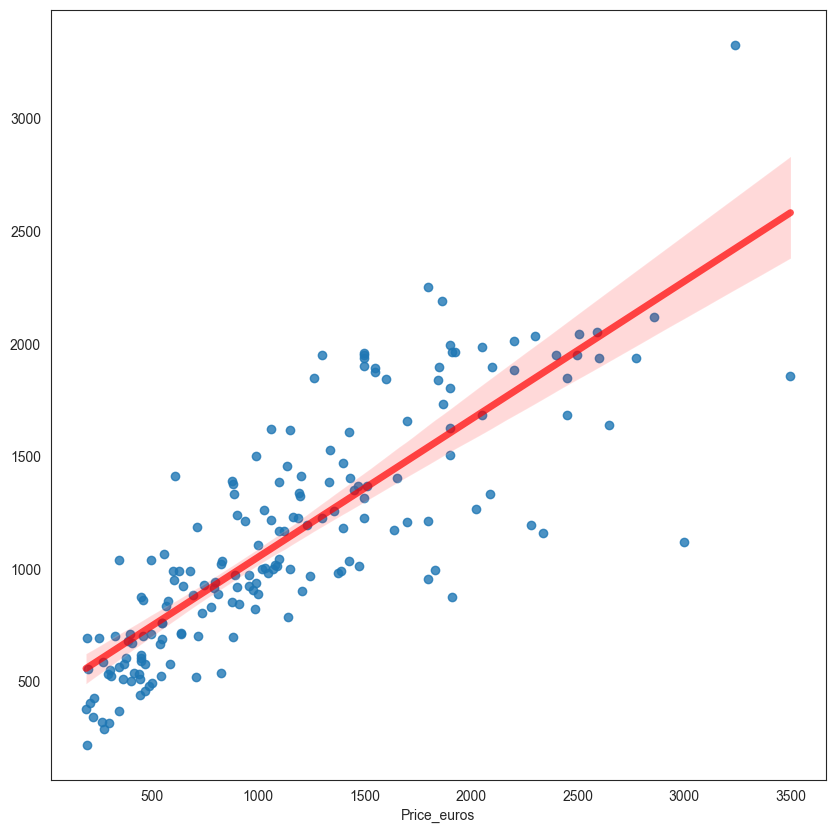

In [13]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.regplot(y_test, model_scale.predict(X_test_scale), line_kws={"color":"r","alpha":0.7,"lw":5});

In [11]:
from sklearn import metrics

# Calculamos los errores
print('Train MAE:', metrics.mean_absolute_error(y_train, model_scale.predict(X_train_scale)))
print('Test MAE:', metrics.mean_absolute_error(y_test, model_scale.predict(X_test_scale)))
print("")
print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, model_scale.predict(X_train_scale)))
print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test, model_scale.predict(X_test_scale)))
print("")
print('Train MSE:', metrics.mean_squared_error(y_train, model_scale.predict(X_train_scale)))
print('Test MSE:', metrics.mean_squared_error(y_test, model_scale.predict(X_test_scale)))
print("")
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model_scale.predict(X_train_scale))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_scale.predict(X_test_scale))))
print("")
print('Train score', model_scale.score(X_train, model_scale.predict(X_train_scale)))
print('Test score', model_scale.score(X_test, model_scale.predict(X_test_scale)))

Train MAE: 283.3272829055041
Test MAE: 285.00115296735055

Train MAPE: 0.29397525687068676
Test MAPE: 0.3244335204457459

Train MSE: 161452.14524116743
Test MSE: 160513.89235016794

Train RMSE: 401.8110815310691
Test RMSE: 400.64185047267335

Train score -2.6718978018963937e+25
Test score -3.4482487392816266e+25


c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## Conclusión

El RMSE, la métrica utilizada, es de 400, lo que empeora los resultados en el modelo base (381).

Descartamos aplicar estandarización.